### 1.Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
import statsmodels.api as sm
import pylab as py
from sklearn import preprocessing
from sklearn.preprocessing import normalize

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
students = pd.read_csv("StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


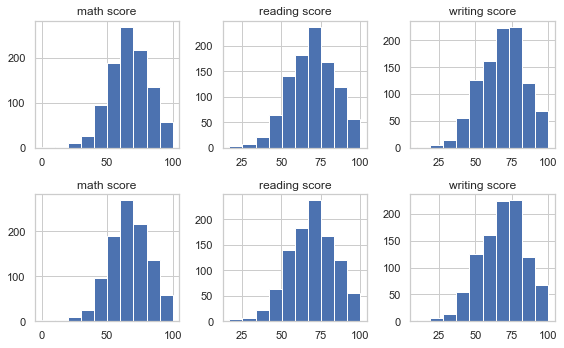

In [3]:
degisken = ["math score","reading score","writing score"]         #ilgili histogramlara baktığımızda normald dağılıma sahip veya
                                                                    #yakın gibi gözüküyor.İstatiksel testlerle bakalım.
plt.figure(figsize=(8,5))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.hist(students[degisken[i]])
    plt.title(degisken[i])
    
for i in range(3):    
    plt.subplot(2,3,i+4)
    plt.hist(winsorize(students[degisken[i]]))
    plt.title(degisken[i])

    plt.tight_layout()
plt.show()

In [4]:
from scipy.stats import shapiro               # shapiro ile scorların normal dağılıma sahip oldup olmadığını test edersek: 
ms = shapiro(students["math score"])           # 3 scor da p > 0.05 kosulunu saglamadığı için normal dağılımlı degildir. 
print("math score için:{}".format(ms),"\n")

rs = shapiro(students["reading score"])
print("reading score için:{}".format(rs),"\n")

ws = shapiro(students["writing score"])
print("writing score için:{}".format(ws))

math score için:ShapiroResult(statistic=0.9931505918502808, pvalue=0.00014530023327097297) 

reading score için:ShapiroResult(statistic=0.9929210543632507, pvalue=0.0001056220498867333) 

writing score için:ShapiroResult(statistic=0.9919633269309998, pvalue=2.9172901122365147e-05)


In [5]:
from scipy.stats import jarque_bera                                   # jarque_bera ve normaltest testleri de uygulandığında
from scipy.stats import normaltest                                    # aynı sekilde normal dağılıma sahip olmadığı görülür.

pd.options.display.float_format = '{:.5f}'.format

scores = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['score', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for score in scores:
    jb_stats = jarque_bera(students[score])
    norm_stats = normaltest(students[score])
    dagilim_testleri = dagilim_testleri.append({"score": score,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,score,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,15.91226,0.00035,15.40896,0.00045
1,reading score,11.38330,0.00337,11.11741,0.00385
2,writing score,13.98509,0.00092,13.60645,0.00111


In [6]:
# 3 scor da normal dağılımlı olmadığı için normalizasyon uygulayalım:

In [7]:
students["norm_math score"] = normalize(np.array(students["math score"]).reshape(1,-1)).reshape(-1,1)
students["norm_reading score"] = normalize(np.array(students["reading score"]).reshape(1,-1)).reshape(-1,1)
students["norm_writing score"] = normalize(np.array(students["writing score"]).reshape(1,-1)).reshape(-1,1)
norm_features = ["math score","norm_math score","reading score",
                 "norm_reading score","writing score","norm_writing score"]

print('Minimum Değer\n-----------------',)
print(students[norm_features].min())
print('\nMaksimum Değer\n-----------------',)
print(students[norm_features].max())

Minimum Değer
-----------------
math score            0.00000
norm_math score       0.00000
reading score        17.00000
norm_reading score    0.00760
writing score        10.00000
norm_writing score    0.00454
dtype: float64

Maksimum Değer
-----------------
math score           100.00000
norm_math score        0.04664
reading score        100.00000
norm_reading score     0.04473
writing score        100.00000
norm_writing score     0.04535
dtype: float64


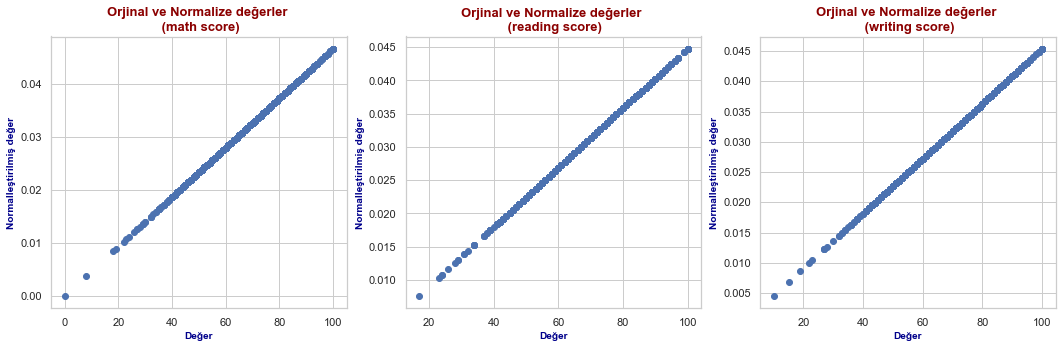

In [8]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(students[norm_features[2*i]], students[norm_features[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(norm_features[2*i]), fontdict=baslik_font)
    plt.xlabel("Değer", fontdict=eksen_font)
    plt.ylabel("Normalleştirilmiş değer", fontdict=eksen_font)

plt.show()

### 2.Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [9]:
students["final_score"] = (students["math score"]+students["reading score"]+students["writing score"])/3

In [10]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,norm_math score,norm_reading score,norm_writing score,final_score
0,female,group B,bachelor's degree,standard,none,72,72,74,0.03358,0.03221,0.03356,72.66667
1,female,group C,some college,standard,completed,69,90,88,0.03218,0.04026,0.03991,82.33333
2,female,group B,master's degree,standard,none,90,95,93,0.04197,0.04250,0.04218,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.02192,0.02550,0.01995,49.33333
4,male,group C,some college,standard,none,76,78,75,0.03545,0.03489,0.03401,76.33333


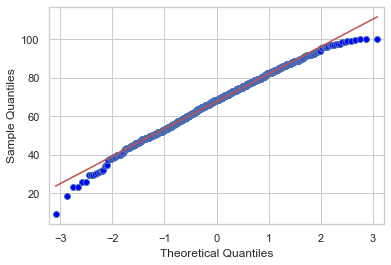

In [11]:
sm.qqplot(students["final_score"],line="s")    #grafikte normale yakın bi dağılım görülüyor.
py.show()

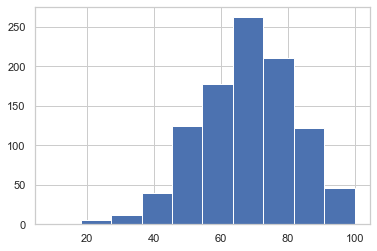

In [12]:
plt.hist(students["final_score"])
plt.show()

In [13]:
shapiro(students["final_score"])  #görüldüğü üzere yeni olusturulan final_score değişkeni normal dağılımlı degil.

ShapiroResult(statistic=0.9931488633155823, pvalue=0.0001449410046916455)

In [14]:
normaltest(students["final_score"])

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)

In [15]:
jarque_bera(students["final_score"])

Jarque_beraResult(statistic=15.453387913085164, pvalue=0.00044089934264401887)

In [16]:
#normalizasyon ile normal dağılıma getirmeye calısalım:

students["norm_final_score"] = normalize(np.array(students["final_score"]).reshape(1,-1)).reshape(-1,1)

In [17]:
print("final_score min deger: {}".format(students["final_score"].min()),"\n")
print("norm_final_score min deger: {}".format(students["norm_final_score"].min()),"\n")
print("final_score max deger: {}".format(students["final_score"].max()),"\n")
print("norm_final_score max deger: {}".format(students["norm_final_score"].max()),"\n")

final_score min deger: 9.0 

norm_final_score min deger: 0.004109661304911046 

final_score max deger: 100.0 

norm_final_score max deger: 0.04566290338790051 



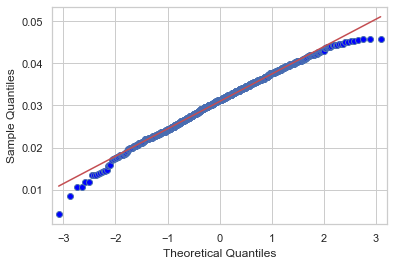

In [18]:
sm.qqplot(students["norm_final_score"],line="s")
py.show()

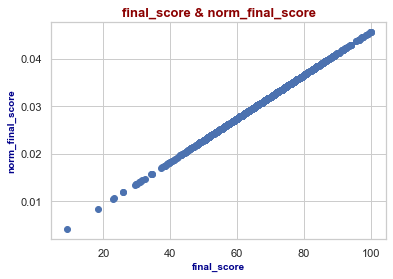

In [19]:
plt.scatter(students["final_score"],students["norm_final_score"])
plt.title("final_score & norm_final_score",fontdict=baslik_font)
plt.xlabel("final_score",fontdict=eksen_font)
plt.ylabel("norm_final_score",fontdict=eksen_font)
plt.show()

### 3.Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [20]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,norm_math score,norm_reading score,norm_writing score,final_score,norm_final_score
0,female,group B,bachelor's degree,standard,none,72,72,74,0.03358,0.03221,0.03356,72.66667,0.03318
1,female,group C,some college,standard,completed,69,90,88,0.03218,0.04026,0.03991,82.33333,0.03760
2,female,group B,master's degree,standard,none,90,95,93,0.04197,0.04250,0.04218,92.66667,0.04231
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.02192,0.02550,0.01995,49.33333,0.02253
4,male,group C,some college,standard,none,76,78,75,0.03545,0.03489,0.03401,76.33333,0.03486


In [21]:
students.corr()

,math score,reading score,writing score,norm_math score,norm_reading score,norm_writing score,final_score,norm_final_score
math score,1.00000,0.81758,0.80264,1.00000,0.81758,0.80264,0.91875,0.91875
reading score,0.81758,1.00000,0.95460,0.81758,1.00000,0.95460,0.97033,0.97033
writing score,0.80264,0.95460,1.00000,0.80264,0.95460,1.00000,0.96567,0.96567
norm_math score,1.00000,0.81758,0.80264,1.00000,0.81758,0.80264,0.91875,0.91875
norm_reading score,0.81758,1.00000,0.95460,0.81758,1.00000,0.95460,0.97033,0.97033
norm_writing score,0.80264,0.95460,1.00000,0.80264,0.95460,1.00000,0.96567,0.96567
final_score,0.91875,0.97033,0.96567,0.91875,0.97033,0.96567,1.00000,1.00000
norm_final_score,0.91875,0.97033,0.96567,0.91875,0.97033,0.96567,1.00000,1.00000


<AxesSubplot:>

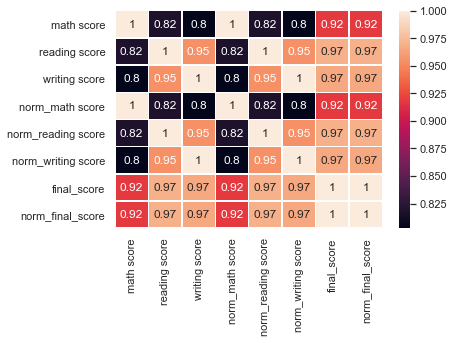

In [22]:
sns.heatmap(students.corr(),annot=True,linewidth=0.5)  # final_score degişkeni 0.97 ile en çok reading_score ve
                                                       # writing score ile ilşkili görünüyor.Sonrasında 0.92 corr ile math score
                                                       # ile ilişkili

In [23]:
# istatiksel olarak aralarında anlamlı fark olup olmadığına bakarsak:
# final_score ile writing score arasında anlamlı fark yoktur.(p_value > 0.05)
# reading ve math skorları ile final_score arasında anlamlı fark vardır.(p_value < 0.05)

In [24]:
scores = ["math score", "reading score", "writing score"]
hipotez_testleri = pd.DataFrame(columns=["score","t_stats","p_value"])
for score in scores:
    ttest = stats.ttest_ind(students["final_score"],students[score])
    hipotez_testleri = hipotez_testleri.append({"score": score + " & final_score",
                                                
                                                "t_stats": ttest[0] , 
                                                "p_value" : ttest[1]
                                               }, ignore_index=True)
hipotez_testleri

,score,t_stats,p_value
0,math score & final_score,2.55506,0.01069
1,reading score & final_score,-2.16689,0.03036
2,writing score & final_score,-0.42999,0.66725


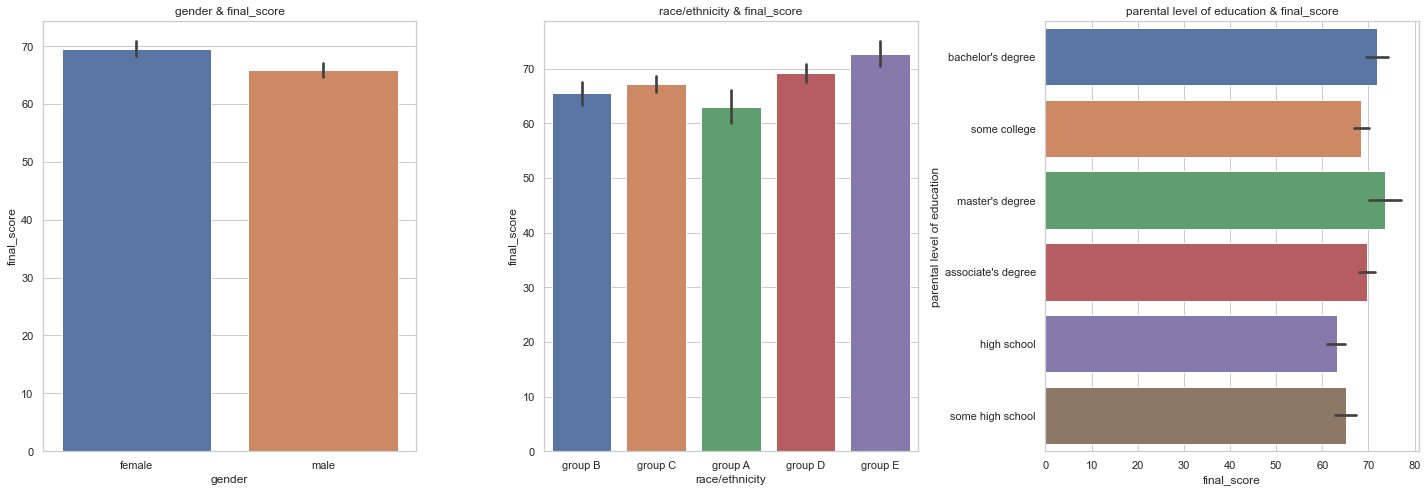

In [25]:
## final_score için:

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot("gender","final_score" , data=students)
plt.title("gender & final_score")

plt.subplot(1,3,2)
sns.barplot("race/ethnicity" , "final_score", data=students)
plt.title("race/ethnicity & final_score")

plt.subplot(1,3,3)
sns.barplot(y="parental level of education",x="final_score", data=students)
plt.title("parental level of education & final_score")

plt.tight_layout()

plt.show()

In [49]:
# final_score için gender degiskeni değişkenini incelersek 
#grafikte kadınların daha basarılı oldugu görülüyor istatiksel olarak da degerlendirirelim,
# female ve male arasında anlamlı bi fark yoktur diyemeyiz,aralarında fark var demek ki grafikteki ifade dogru
# demek ki gender degiskeninin female ya da male olması final score degiskenini etkiler.

for var in ["score"]:
    karsilastirma = pd.DataFrame(columns=['score','female', 'male','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end=' ')
    
    ttest = stats.ttest_ind(students[students["gender"]=="female"]["final_score"],
                            students[students["gender"]=="male"]["final_score"])
    female = "female"
    male = "male"
    istatistik = ttest[0]               
    p_degeri = ttest[1]
            
    karsilastirma = karsilastirma.append({"score":"final_score",
                                                "female" : female,
                                                  "male" : male ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

score için karşılaştırma 

,score,female,male,istatistik,p_degeri
0,final_score,female,male,4.169913529142000,0.000033119736382


In [28]:
# final_score için race/ethnicity degiskeninin t-ist ve pvalue degerlerini incelersek:
# B,D,C grupları arasında anlamlı bi fark yoktur.A ve E tüm gruplardan anlamlı olarak farklıdır.
# bu sebepten race/ethnicity degiskeni de final scoru etkiler.


gruplar = students["race/ethnicity"].unique()
grup_students = students.groupby("race/ethnicity")
 
pd.options.display.float_format = '{:.15f}'.format

for var in ["final_score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    
    for i in range(0, len(gruplar)):
        for j in range(i+1, len(gruplar)):
            ttest = stats.ttest_ind(students[students["race/ethnicity"]==gruplar[i]][var], 
                                students[students["race/ethnicity"]==gruplar[j]][var])
            grup_1 = gruplar[i]
            grup_2 = gruplar[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)
            
      

final_score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.278246741583154,0.201747312277340
1,group B,group A,1.316504366963353,0.189093058950944
2,group B,group D,-2.803108399207725,0.005279949204375
3,group B,group E,-4.460378072613960,0.000011254806794
4,group C,group A,2.466593204095108,0.014052604831601
5,group C,group D,-1.806357695360095,0.071381586738136
6,group C,group E,-3.935868946604548,0.000095801993351
7,group A,group D,-3.717941592338664,0.000233904167488
8,group A,group E,-4.958668289961606,0.000001389791047
9,group D,group E,-2.487048058580620,0.013287580176112


In [29]:
# final_score için parental level of education degiskeninin t-ist ve pvalue degerlerini incelersek:
#  (master's degree-bachelor's degree),(associate's degree-some college),(high school-some high school) gruplarının kendi
# arasında anlamlı bi fark yokken ikiserli gruplara ayırdığımız gruplar arasında anlamlı fark vardır.
# bu sebepten parental level of education degiskeni de final scorunu etkiler.


degrees = students["parental level of education"].unique()
parent_groups = students.groupby("parental level of education")
pd.options.display.float_format = '{:.15f}'.format

for var in ["final_score"]:
    
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(degrees)):
        for j in range(i+1, len(degrees)):
            ttest = stats.ttest_ind(students[students["parental level of education"]==degrees[i]][var], 
                                students[students["parental level of education"]==degrees[j]][var])
            grup_1 = degrees[i]
            grup_2 = degrees[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)
    

final_score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.200746866670862,0.028421853941795
1,bachelor's degree,master's degree,-0.759476950033905,0.448589132120201
2,bachelor's degree,associate's degree,1.501300964598319,0.134211315162234
3,bachelor's degree,high school,5.539323736236874,0.000000064577802
4,bachelor's degree,some high school,3.941854876966818,0.000101033359586
5,some college,master's degree,-2.559652069046644,0.010997532204149
6,some college,associate's degree,-0.844579084343610,0.398798698924585
7,some college,high school,4.047081496222537,0.000061740044264
8,some college,some high school,2.356277575721359,0.018937067340475
9,master's degree,associate's degree,2.014634576109426,0.044902247757125


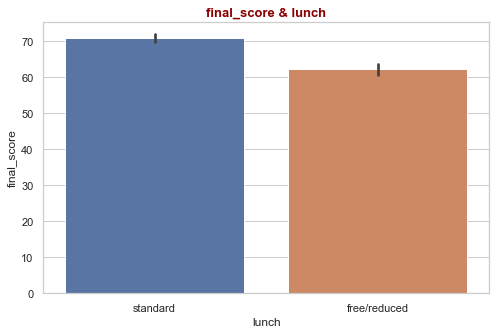

In [37]:
# lunch değişkeninin final_score değişkenini etkileyip etkilemedğine bakalım:

plt.figure(figsize=(8,5))
sns.barplot("lunch","final_score",data=students)
plt.title("final_score & lunch",fontdict=baslik_font)
plt.show()

In [35]:
# final_scoru için öğle yemegi standard ve free/reduced olan öğrenciler arasında anlamlı bir fark yoktur diyemeyiz.
# lunch = standard ve lunch = free/reduced olması final_score üzerinde etkilidir.


fs = stats.ttest_ind(students[students["lunch"]=="standard"]["final_score"],  
                     students[students["lunch"]=="free/reduced"]["final_score"])     
print("final_score için: {}".format(fs))

final_score için: Ttest_indResult(statistic=9.575113051511476, pvalue=7.736791812495384e-21)


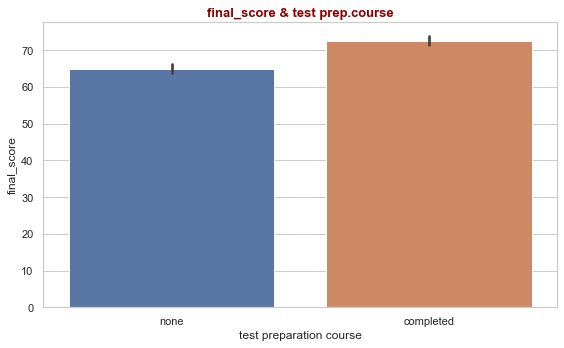

In [38]:
# son olarak da "test preparation course" değişkeninin final_score değişkenini etkileyip etkilemedğine bakalım:

plt.figure(figsize=(8,5))
sns.barplot("test preparation course","final_score",data=students)
plt.title("final_score & test prep.course",fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [39]:
# final_scoru için "test preparation course" değişkeninin none veya completed olması öğrenciler arasında 
# anlamlı bir fark olusturuyor.
# test preparation course = none ve test preparation course = completed olması final_score üzerinde etkilidir.

ts = stats.ttest_ind(students[students["test preparation course"]=="none"]["final_score"],  
                     students[students["test preparation course"]=="completed"]["final_score"])     
print("final_score için: {}".format(ts))

final_score için: Ttest_indResult(statistic=-8.390944443482592, pvalue=1.633780203592351e-16)


In [ ]:
# hem istatiksel olarak hem de grafiklerde görüldüğü gibi "gender","race/ethnicity","parental level of education",
# "lunch","test preparation course" değişkenleri final score değişkeni üzerinde etkilidir.